In [2]:
import cv2

# Load image
image = cv2.imread("car.jpg")  

# Compress using JPEG with 50% quality
cv2.imwrite("compressed_image.jpg", image, [cv2.IMWRITE_JPEG_QUALITY, 50])

print("Lossy compression using JPEG completed.")


Lossy compression using JPEG completed.


In [ ]:
# Compress using PNG with max compression
cv2.imwrite("compressed_image.png", image, [cv2.IMWRITE_PNG_COMPRESSION, 9])

print("Lossless compression using PNG completed.")


In [2]:
import cv2
import os

# Load image
image_path = "car.jpg"  # Change to your image path
image = cv2.imread(image_path)

# Original file size
original_size = os.path.getsize(image_path)

# Lossy Compression (JPEG)
jpeg_path = "compressed_image.jpg"
cv2.imwrite(jpeg_path, image, [cv2.IMWRITE_JPEG_QUALITY, 50])
jpeg_size = os.path.getsize(jpeg_path)

# Lossless Compression (PNG)
png_path = "compressed_image.png"
cv2.imwrite(png_path, image, [cv2.IMWRITE_PNG_COMPRESSION, 9])
png_size = os.path.getsize(png_path)

# Print file sizes
print(f"Original Image Size: {original_size / 1024:.2f} KB")
print(f"JPEG Compressed Size: {jpeg_size / 1024:.2f} KB (Lossy)")
print(f"PNG Compressed Size: {png_size / 1024:.2f} KB (Lossless)")


Original Image Size: 819.91 KB
JPEG Compressed Size: 717.43 KB (Lossy)
PNG Compressed Size: 8360.68 KB (Lossless)


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns


In [4]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values (0-1 range)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for CNN input (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [5]:
from sklearn.model_selection import train_test_split

# Split training data into 80% train and 20% validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [6]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)


c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9007 - loss: 0.3205 - val_accuracy: 0.9832 - val_loss: 0.0560
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9855 - loss: 0.0491 - val_accuracy: 0.9854 - val_loss: 0.0452
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9909 - loss: 0.0296 - val_accuracy: 0.9910 - val_loss: 0.0316
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9932 - loss: 0.0200 - val_accuracy: 0.9893 - val_loss: 0.0371
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9952 - loss: 0.0143 - val_accuracy: 0.9879 - val_loss: 0.0417
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9968 - loss: 0.0109 - val_accuracy: 0.9896 - val_loss: 0.0392
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9978 - loss: 0.0076 - val_accuracy: 0.9905 - val_loss: 0.0438
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9975 - loss: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.97      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       1.00      0.98      0.99       974
           9       1.00      0.95      0.97      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



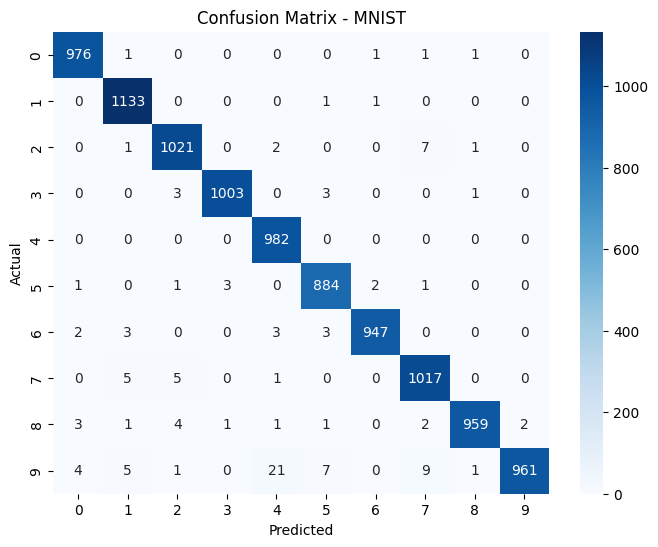

In [7]:
# Evaluate on test set
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
print(classification_report(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - MNIST")
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


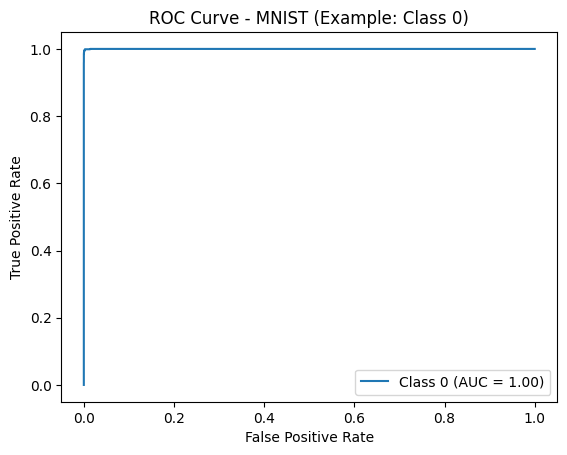

In [8]:
from sklearn.preprocessing import label_binarize

# Binarize labels for ROC-AUC calculation
y_test_bin = label_binarize(y_true, classes=range(10))
y_pred_prob = model.predict(x_test)

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for class 0
plt.figure()
plt.plot(fpr[0], tpr[0], label=f'Class 0 (AUC = {roc_auc[0]:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MNIST (Example: Class 0)')
plt.legend()
plt.show()


In [9]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize (0-1 range)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Split into 80-20
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 690s 4us/step


In [10]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15, batch_size=32)


c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.3393 - loss: 1.7788 - val_accuracy: 0.5269 - val_loss: 1.2905
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5739 - loss: 1.1969 - val_accuracy: 0.6265 - val_loss: 1.0560
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.6421 - loss: 1.0157 - val_accuracy: 0.6591 - val_loss: 0.9786
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.6916 - loss: 0.8817 - val_accuracy: 0.6713 - val_loss: 0.9402
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7198 - loss: 0.7948 - val_accuracy: 0.6721 - val_loss: 0.9485
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7515 - loss: 0.7065 - val_accuracy: 0.7003 - val_loss: 0.8812
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.7774 - loss: 0.6309 - val_accuracy: 0.6990 - val_loss: 0.9001
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.7967 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      1000
           1       0.80      0.85      0.82      1000
           2       0.65      0.57      0.61      1000
           3       0.52      0.55      0.53      1000
           4       0.65      0.68      0.67      1000
           5       0.64      0.62      0.63      1000
           6       0.71      0.81      0.76      1000
           7       0.79      0.70      0.74      1000
           8       0.82      0.75      0.78      1000
           9       0.84      0.73      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



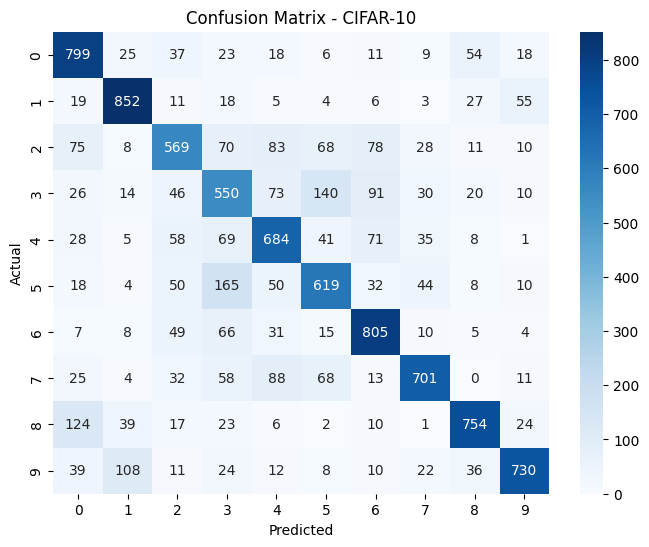

In [11]:
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
print(classification_report(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CIFAR-10")
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


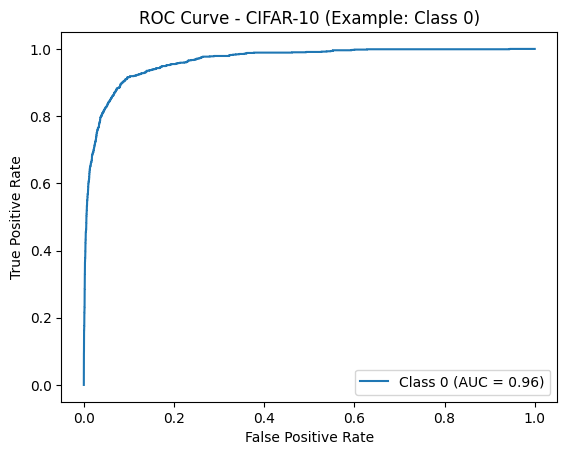

In [12]:
y_test_bin = label_binarize(y_true, classes=range(10))
y_pred_prob = model.predict(x_test)

fpr, tpr, roc_auc = {}, {}, {}

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for class 0
plt.figure()
plt.plot(fpr[0], tpr[0], label=f'Class 0 (AUC = {roc_auc[0]:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CIFAR-10 (Example: Class 0)')
plt.legend()
plt.show()
